In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('new_cook_corr.csv')

In [3]:
data

,Unnamed: 0,compound,atm_ra,vdw_ra,e_aff_a,ion_e_a,c,band_gap,mat_id
0,0,ScBr3,1.60,2.30,0.187,6.560,3.52,2.23,mp-1186984
1,1,ScI3,1.60,2.30,0.187,6.560,3.82,1.69,mp-1186991
2,2,TiF3,1.40,2.15,0.087,6.830,13.72,0.00,mp-562468
3,3,TiCl3,1.40,2.15,0.080,6.820,12.55,0.00,mp-567330
4,4,TiCl3,1.40,2.15,0.080,6.820,18.91,0.00,mp-23275
...,...,...,...,...,...,...,...,...,...
61,61,PtBr3,1.35,2.05,2.120,9.016,9.27,0.95,mp-23165
62,62,PtI3,1.35,2.05,2.120,9.016,13.56,0.35,mp-28268
63,63,AuF3,1.35,2.10,2.300,9.220,16.62,1.55,mp-942
64,64,AuCl3,1.35,2.10,2.310,9.230,7.11,1.36,mp-27647


In [4]:
X = data.iloc[:,2:7].values
y = data.iloc[:,7].values

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1,random_state=1)

In [6]:
X_train.shape,X_test.shape

((59, 5), (7, 5))

In [7]:
from sklearn.kernel_ridge import KernelRidge
params = {'alpha': np.arange(0.1,100,0.1), 'kernel':['poly','rbf']}
search = GridSearchCV(KernelRidge(), param_grid = params, cv = 5,scoring='neg_mean_absolute_error',verbose=1,return_train_score=True )
#search.fit(scaler.transform(X_train),y_train)

In [8]:
scaler = StandardScaler()

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
scores = []
cv = KFold(n_splits=5, shuffle=True, random_state=1)
for train, test in cv.split(X_train, y_train):
    scaler.fit(X_train[train])
    search.fit(scaler.transform(X_train[train]),y_train[train])
search.best_params_

Fitting 5 folds for each of 1998 candidates, totalling 9990 fits
Fitting 5 folds for each of 1998 candidates, totalling 9990 fits
Fitting 5 folds for each of 1998 candidates, totalling 9990 fits
Fitting 5 folds for each of 1998 candidates, totalling 9990 fits
Fitting 5 folds for each of 1998 candidates, totalling 9990 fits


{'alpha': 0.1, 'kernel': 'rbf'}

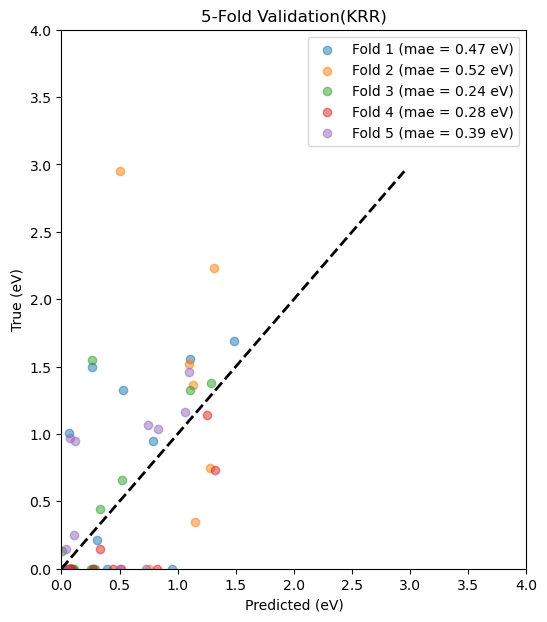

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
model = KernelRidge(alpha = 0.1, kernel='rbf')
scores = []
scaler = StandardScaler()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
fig = plt.figure(figsize=(6,7))
i = 1
for train, test in cv.split(X_train, y_train):
    scaler.fit(X_train[train])
    model.fit(scaler.transform(X_train[train]),
                 y_train[train])
    prediction = abs(model.predict(scaler.transform(X_train[test])))
    true = y_train[test]
    score = mean_absolute_error(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=1, alpha=0.5, 
                label='Fold %d (mae = %0.2f eV)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted (eV)')
plt.ylabel('True (eV)')
plt.title('5-Fold Validation(KRR)')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend()
plt.savefig('newKRR_5foldVal.png')
plt.show()


In [11]:
from sklearn.kernel_ridge import KernelRidge
params = {'alpha': np.arange(0.1,100,0.1), 'kernel':['poly','rbf']}
search = GridSearchCV(KernelRidge(), param_grid = params, cv = 5,scoring='neg_mean_absolute_error',verbose=1,return_train_score=True )
search.fit(scaler.transform(X_train),y_train)

Fitting 5 folds for each of 1998 candidates, totalling 9990 fits


GridSearchCV(cv=5, estimator=KernelRidge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,...
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9]),
                         'kernel': ['poly', 'rbf']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [12]:
search.best_params_

{'alpha': 0.1, 'kernel': 'rbf'}

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
reg = KernelRidge(kernel = 'rbf', alpha = 0.1)
reg.fit(scaler.transform(X_train),y_train)
y_pred = abs(reg.predict(scaler.transform(X_test)))
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [14]:
print("mse",mse, 'mae',mae,'rmse',rmse)

mse 0.1432979118608469 mae 0.3052054253904937 rmse 0.3785471065281663


In [15]:
y_test,y_pred

(array([1.52, 1.68, 1.05, 0.  , 0.  , 1.9 , 0.  ]),
 array([0.91247522, 1.34505767, 0.91522343, 0.03197359, 0.12238028,
        1.24974071, 0.25458115]))